In [57]:
import nltk
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [58]:
tweets = pd.read_json("C:/Users/HP/anaconda3/DataScience/NaturalLanguageProcessing/tweets.json")

In [59]:
print(len(tweets))

2


In [60]:
df= tweets

In [61]:
df=df.T

In [62]:
df.head()

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   

                                                                      tweet_text  
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...  
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...  
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...  
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...  
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...

In [63]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
unique_text = df.tweet_text.unique()
print(len(unique_text))

41776


In [64]:
df.head()

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   

                                                                      tweet_text  
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...  
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...  
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...  
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...  
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...

In [65]:
df['tweet_text'][0]

'⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'

In [66]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern,input_text)
    for i in r:
        input_text= re.sub(i,'',input_text)
        
    return input_text

### Remove any @mentions

In [67]:
df['clean_text']= np.vectorize(remove_pattern)(df['tweet_text'],"@[\w]*")
df['clean_text'][0:5]

2013-07-18 09:39:46.071961602    ⚕️ Scientists conducted a Phase II study of ac...
2013-07-17 03:40:32.173842437    This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2013-07-15 15:41:16.553048065    #NICE backs #AstraZenecas #Calquence for #CLL ...
2013-07-12 19:19:42.367813635    #acalabrutinib is a valuable option in pts int...
2013-07-04 12:40:34.334232586    NICE has recommended the use of acalabrutinib ...
Name: clean_text, dtype: object

In [104]:
df['clean_text']= df['clean_text'].str.replace("[^a-zA-Z#]"," ")
df['clean_text']= df['clean_text'].str.replace("[[\w]'']"," ")
df['clean_text'][0:5]

<ipython-input-104-acd3bf826c60>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']= df['clean_text'].str.replace("[^a-zA-Z#]"," ")
<ipython-input-104-acd3bf826c60>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']= df['clean_text'].str.replace("[[\w]'']"," ")
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\strings\object_array.py:160: FutureWarning: Possible nested set at position 1
  compiled = re.compile(pat, flags=flags)


2013-07-18 09:39:46.071961602    scientists conducted a phase ii study of acala...
2013-07-17 03:40:32.173842437    this phase acalabrutinib venetoclax av trial t...
2013-07-15 15:41:16.553048065    nice backs astrazenecas calquence for cll http...
2013-07-12 19:19:42.367813635    acalabrutinib is a valuable option in pts into...
2013-07-04 12:40:34.334232586    nice has recommended the use of acalabrutinib ...
Name: clean_text, dtype: object

In [105]:
df['clean_text']= df['clean_text'].str.lower()
df['clean_text'][0:5]

2013-07-18 09:39:46.071961602    scientists conducted a phase ii study of acala...
2013-07-17 03:40:32.173842437    this phase acalabrutinib venetoclax av trial t...
2013-07-15 15:41:16.553048065    nice backs astrazenecas calquence for cll http...
2013-07-12 19:19:42.367813635    acalabrutinib is a valuable option in pts into...
2013-07-04 12:40:34.334232586    nice has recommended the use of acalabrutinib ...
Name: clean_text, dtype: object

In [106]:
df['clean_text']=df['clean_text'].str.replace("[#]","")
df['clean_text'][0:5]

<ipython-input-106-f9c9532fdd3e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']=df['clean_text'].str.replace("[#]","")


2013-07-18 09:39:46.071961602    scientists conducted a phase ii study of acala...
2013-07-17 03:40:32.173842437    this phase acalabrutinib venetoclax av trial t...
2013-07-15 15:41:16.553048065    nice backs astrazenecas calquence for cll http...
2013-07-12 19:19:42.367813635    acalabrutinib is a valuable option in pts into...
2013-07-04 12:40:34.334232586    nice has recommended the use of acalabrutinib ...
Name: clean_text, dtype: object

In [107]:
df['clean_text']=df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(x)>2]))
df.head()

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   

                                                                      tweet_text  \
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...   
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...   
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...   
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...   

                                                                      clean_text  \
2013-07-18 09:39:46.071961602  scientists conducted a phase ii study of acala...   
2013-07-17 03:40:32.173842437  this phase acalabrutinib venetoclax av trial t...   
2013-07-15 15:41:16.553048065  nice backs astrazenecas calquence for cll http...   
2013-07-12 19:19:42.367813635  acalabrutinib is a valuable option in pts into...   
2013-07-04 12:40:34.334232586  nice has recommended the use of acalabrutinib ...   

                                                                       tokenized  \
2013-07-18 09:39:46.071961602  [scientists, conducted, phase, ii, study, acal...   
2013-07-17 03:40:32.173842437  [phase, acalabrutinib, venetoclax, av, trial, ...   
2013-07-15 15:41:16.553048065  [nice, backs, astrazenecas, calquence, cll, ht...   
2013-07-12 19:19:42.367813635  [acalabrutinib, valuable, option, pts, intoler...   
2013-07-04 12:40:34.334232586  [nice, recommended, use, acalabrutinib, patien...   

                                                                       lemmatize  
2013-07-18 09:39:46.071961602  [scientist, conducted, phase, ii, study, acala...  
2013-07-17 03:40:32.173842437  [phase, acalabrutinib, venetoclax, av, trial, ...  
2013-07-15 15:41:16.553048065  [nice, back, astrazenecas, calquence, cll, htt...  
2013-07-12 19:19:42.367813635  [acalabrutinib, valuable, option, pt, intolera...  
2013-07-04 12:40:34.334232586  [nice, recommended, use, acalabrutinib, patien...

In [108]:
tokenized_tweet = df['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

2013-07-18 09:39:46.071961602    [scientists, conducted, a, phase, ii, study, o...
2013-07-17 03:40:32.173842437    [this, phase, acalabrutinib, venetoclax, av, t...
2013-07-15 15:41:16.553048065    [nice, backs, astrazenecas, calquence, for, cl...
2013-07-12 19:19:42.367813635    [acalabrutinib, is, a, valuable, option, in, p...
2013-07-04 12:40:34.334232586    [nice, has, recommended, the, use, of, acalabr...
Name: clean_text, dtype: object

In [109]:
df['tokenized']=tokenized_tweet

In [110]:
df.head()

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   

                                                                      tweet_text  \
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...   
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...   
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...   
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...   

                                                                      clean_text  \
2013-07-18 09:39:46.071961602  scientists conducted a phase ii study of acala...   
2013-07-17 03:40:32.173842437  this phase acalabrutinib venetoclax av trial t...   
2013-07-15 15:41:16.553048065  nice backs astrazenecas calquence for cll http...   
2013-07-12 19:19:42.367813635  acalabrutinib is a valuable option in pts into...   
2013-07-04 12:40:34.334232586  nice has recommended the use of acalabrutinib ...   

                                                                       tokenized  \
2013-07-18 09:39:46.071961602  [scientists, conducted, a, phase, ii, study, o...   
2013-07-17 03:40:32.173842437  [this, phase, acalabrutinib, venetoclax, av, t...   
2013-07-15 15:41:16.553048065  [nice, backs, astrazenecas, calquence, for, cl...   
2013-07-12 19:19:42.367813635  [acalabrutinib, is, a, valuable, option, in, p...   
2013-07-04 12:40:34.334232586  [nice, has, recommended, the, use, of, acalabr...   

                                                                       lemmatize  
2013-07-18 09:39:46.071961602  [scientist, conducted, phase, ii, study, acala...  
2013-07-17 03:40:32.173842437  [phase, acalabrutinib, venetoclax, av, trial, ...  
2013-07-15 15:41:16.553048065  [nice, back, astrazenecas, calquence, cll, htt...  
2013-07-12 19:19:42.367813635  [acalabrutinib, valuable, option, pt, intolera...  
2013-07-04 12:40:34.334232586  [nice, recommended, use, acalabrutinib, patien...

In [111]:
df['tokenized']=df['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [112]:
df.head()

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   

                                                                      tweet_text  \
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...   
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...   
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...   
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...   

                                                                      clean_text  \
2013-07-18 09:39:46.071961602  scientists conducted a phase ii study of acala...   
2013-07-17 03:40:32.173842437  this phase acalabrutinib venetoclax av trial t...   
2013-07-15 15:41:16.553048065  nice backs astrazenecas calquence for cll http...   
2013-07-12 19:19:42.367813635  acalabrutinib is a valuable option in pts into...   
2013-07-04 12:40:34.334232586  nice has recommended the use of acalabrutinib ...   

                                                                       tokenized  \
2013-07-18 09:39:46.071961602  [scientists, conducted, phase, ii, study, acal...   
2013-07-17 03:40:32.173842437  [phase, acalabrutinib, venetoclax, av, trial, ...   
2013-07-15 15:41:16.553048065  [nice, backs, astrazenecas, calquence, cll, ht...   
2013-07-12 19:19:42.367813635  [acalabrutinib, valuable, option, pts, intoler...   
2013-07-04 12:40:34.334232586  [nice, recommended, use, acalabrutinib, patien...   

                                                                       lemmatize  
2013-07-18 09:39:46.071961602  [scientist, conducted, phase, ii, study, acala...  
2013-07-17 03:40:32.173842437  [phase, acalabrutinib, venetoclax, av, trial, ...  
2013-07-15 15:41:16.553048065  [nice, back, astrazenecas, calquence, cll, htt...  
2013-07-12 19:19:42.367813635  [acalabrutinib, valuable, option, pt, intolera...  
2013-07-04 12:40:34.334232586  [nice, recommended, use, acalabrutinib, patien...

In [113]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [114]:

df['lemmatize'] = df['tokenized'].apply(lambda lst:[lemmatizer.lemmatize(word) for word in lst])
df['lemmatize']

2013-07-18 09:39:46.071961602    [scientist, conducted, phase, ii, study, acala...
2013-07-17 03:40:32.173842437    [phase, acalabrutinib, venetoclax, av, trial, ...
2013-07-15 15:41:16.553048065    [nice, back, astrazenecas, calquence, cll, htt...
2013-07-12 19:19:42.367813635    [acalabrutinib, valuable, option, pt, intolera...
2013-07-04 12:40:34.334232586    [nice, recommended, use, acalabrutinib, patien...
2013-07-04 08:44:42.278539265    [nice, back, astrazeneca, calquence, cll, http...
2013-07-04 04:22:03.305394179    [england, decision, usually, come, wale, info,...
2013-07-03 21:48:41.159868423    [astrazeneca, calquence, acalabrutinib, chemot...
2013-07-03 15:55:15.081797632    [superstar, responding, excellent, news, nice,...
2013-07-03 04:25:53.837944834    [cll, patient, know, drug, ibrutinib, yesterda...
2013-07-02 18:11:16.191608837    [optimal, management, high, risk, cll, acalabr...
2013-07-01 07:14:41.230188555    [acalabrutinib, form, cll, nice, today, get, r...
2013

In [115]:
df.head()

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   

                                                                      tweet_text  \
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...   
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...   
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...   
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...   

                                                                      clean_text  \
2013-07-18 09:39:46.071961602  scientists conducted a phase ii study of acala...   
2013-07-17 03:40:32.173842437  this phase acalabrutinib venetoclax av trial t...   
2013-07-15 15:41:16.553048065  nice backs astrazenecas calquence for cll http...   
2013-07-12 19:19:42.367813635  acalabrutinib is a valuable option in pts into...   
2013-07-04 12:40:34.334232586  nice has recommended the use of acalabrutinib ...   

                                                                       tokenized  \
2013-07-18 09:39:46.071961602  [scientists, conducted, phase, ii, study, acal...   
2013-07-17 03:40:32.173842437  [phase, acalabrutinib, venetoclax, av, trial, ...   
2013-07-15 15:41:16.553048065  [nice, backs, astrazenecas, calquence, cll, ht...   
2013-07-12 19:19:42.367813635  [acalabrutinib, valuable, option, pts, intoler...   
2013-07-04 12:40:34.334232586  [nice, recommended, use, acalabrutinib, patien...   

                                                                       lemmatize  
2013-07-18 09:39:46.071961602  [scientist, conducted, phase, ii, study, acala...  
2013-07-17 03:40:32.173842437  [phase, acalabrutinib, venetoclax, av, trial, ...  
2013-07-15 15:41:16.553048065  [nice, back, astrazenecas, calquence, cll, htt...  
2013-07-12 19:19:42.367813635  [acalabrutinib, valuable, option, pt, intolera...  
2013-07-04 12:40:34.334232586  [nice, recommended, use, acalabrutinib, patien...

In [116]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

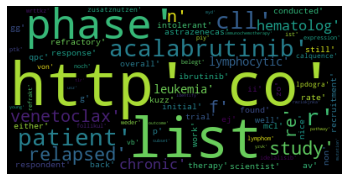

In [117]:
text = df['lemmatize'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()